We have stored the NAAMES data to Azure Cloud Storage and to read it we will use the Python API. 

ifcb storage account -> naames container -> NAAMES_ml folder

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
import imageio

In [3]:
import getpass

In [4]:
pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [5]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

In [6]:
import tensorflow as tf
import datetime

In [7]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [8]:
import azure.storage.blob

In [9]:
import sys
sys.path.append('../')

In [10]:
import imp

In [11]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [12]:
import data_utils as du

In [13]:
imp.reload(du)

<module 'data_utils' from '../data_utils.py'>

In [14]:
# here we connect to the Azure blob storage
connection_string = getpass.getpass()

 ·····························································································································································································


In [15]:
container_client = azure.storage.blob.ContainerClient.from_connection_string(
    connection_string, container_name="naames"
)

In [16]:
# we limit to a subfolder to test the functionality
#blobs_list = container_client.list_blobs(name_starts_with='NAAMES_ml/D20151102T161705_IFCB107')

In [17]:
container_name = 'naames'
account_name = 'ifcbwesteurope'

In [18]:
url_prefix = f"https://{account_name}.blob.core.windows.net/{container_name}/"

In [19]:
url_prefix

'https://ifcbwesteurope.blob.core.windows.net/naames/'

In [20]:
csv_url = url_prefix + 'image-file-directory.csv'

In [21]:
inventory_df = pd.read_csv(csv_url)
inventory_df

,file_name,class_raw,high_group,missing_high_group,id,lat,long,Area,Biovolume,ConvexArea,...,ScatInt,FluoInt,ScatPeak,FluoPeak,NumberOfROIinTrigger,missing_meta_data,ESDA_exclude,excluded_1,set,binary_label
0,IFCB107D20151104T112022P00433_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T112022P00433,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
1,IFCB107D20151104T114135P00194_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T114135P00194,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
2,IFCB107D20151104T114135P00246_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T114135P00246,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
3,IFCB107D20151104T124515P00027_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T124515P00027,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
4,IFCB107D20151105T174918P00074_Dinophyceae.png,Dinophyceae,Dinoflagellate,False,IFCB107D20151105T174918P00074,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998895,IFCB107D20180412T010113P00020_Ceratium.png,Ceratium,Dinoflagellate,False,IFCB107D20180412T010113P00020,40.348,-68.296,1507.093426,20001.839825,2501.816609,...,1.09682,0.36801,3.33541,1.37789,1.0,False,False,0,train,plankton
1998896,IFCB107D20180412T012434P00137_Ditylum.png,Ditylum,Diatom,False,IFCB107D20180412T012434P00137,40.324,-68.387,4811.591696,91203.058213,6707.612457,...,3.49742,1.77298,3.35693,3.31523,1.0,False,False,0,train,plankton
1998897,IFCB107D20180412T012434P00348_Ditylum.png,Ditylum,Diatom,False,IFCB107D20180412T012434P00348,40.324,-68.387,2446.626298,30443.529921,3317.560554,...,2.46922,0.90272,3.35900,2.21282,1.0,False,False,0,train,plankton
1998898,IFCB107D20180412T021117P00330_Ceratium.png,Ceratium,Dinoflagellate,False,IFCB107D20180412T021117P00330,40.273,-68.571,1500.951557,19808.704267,2787.802768,...,0.61201,0.04541,2.85538,0.37142,1.0,False,False,0,train,plankton


In [22]:
# subsample the full dataframe for workflow testing
# df_subsample = inventory_df.iloc[:10000,]
# df_subsample = inventory_df.iloc[:1000,]
# df_subsample = inventory_df
df_subsample = inventory_df.sample(n=1000)
df_subsample.reset_index(inplace=True)

In [23]:
df_subsample

,index,file_name,class_raw,high_group,missing_high_group,id,lat,long,Area,Biovolume,...,ScatInt,FluoInt,ScatPeak,FluoPeak,NumberOfROIinTrigger,missing_meta_data,ESDA_exclude,excluded_1,set,binary_label
0,1198237,IFCB107D20160520T071025P00183_Bacillariophyta-...,Bacillariophyta-pennate,Diatom,True,IFCB107D20160520T071025P00183,53.5500,-42.2590,366.868512,2100.356594,...,0.03093,0.27453,0.22530,1.44329,1.0,False,False,0,train,plankton
1,945207,IFCB107D20160512T180922P00132_Cryptophyceae-li...,Cryptophyceae-like,Crypto,False,IFCB107D20160512T180922P00132,41.5096,-65.7097,68.512111,254.878729,...,0.00250,0.00831,0.02383,0.30142,1.0,False,False,0,train,plankton
2,353861,IFCB107D20160529T022922P01427_Unicellular.png,Unicellular,Other,False,IFCB107D20160529T022922P01427,44.0490,-43.7660,29.498270,102.730815,...,0.00237,0.00076,0.01102,0.07056,1.0,False,True,1,train,plankton
3,999618,IFCB107D20160513T163618P00748_Dinophyceae.png,Dinophyceae,Dinoflagellate,False,IFCB107D20160513T163618P00748,43.3175,-59.5157,165.484429,1403.461597,...,0.00469,0.03100,0.01336,0.63844,1.0,False,False,0,train,plankton
4,1604619,IFCB107D20160529T151312P01008_Degraded-.png,Degraded-,Corrupt,True,IFCB107D20160529T151312P01008,44.2201,-43.4820,122.231834,900.498240,...,0.00913,0.06859,0.15068,1.09360,1.0,False,False,0,train,not_plankton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,57111,IFCB107D20151114T160843P01176_Unicellular.png,Unicellular,Other,False,IFCB107D20151114T160843P01176,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
996,273864,IFCB107D20160523T175113P00546_Unicellular.png,Unicellular,Other,False,IFCB107D20160523T175113P00546,48.1187,-40.1714,31.141869,127.609217,...,0.00199,0.00147,0.01097,0.06822,1.0,False,True,1,train,plankton
997,217053,IFCB107D20160521T034750P00908_Unicellular.png,Unicellular,Other,False,IFCB107D20160521T034750P00908,53.4830,-42.0750,35.121107,138.579693,...,0.00187,0.00034,0.01091,0.04296,1.0,False,True,1,train,plankton
998,1218638,IFCB107D20160520T170932P01608_Other.png,Other,Other,False,IFCB107D20160520T170932P01608,53.5290,-42.2370,43.512111,188.276549,...,0.00221,0.00363,0.01101,0.15365,1.0,False,False,0,train,plankton


## create png_path column and 3-column dataframe

In [24]:
# add a column of the png path to the df dataframe
df_subsample['png_path'] = df_subsample['id'].apply(lambda row : du.buildPNGsName(row))

In [25]:
# create a dataframe with just the columns of png_path and high_group
df_files_labels = df_subsample[['png_path', 'high_group']]

In [26]:
# add a column called full_path 
df_files_labels['full_path'] = df_files_labels['png_path'].apply(lambda row : os.path.join(url_prefix,'NAAMES_ml', row))

/tmp/ipykernel_869663/1825214936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_files_labels['full_path'] = df_files_labels['png_path'].apply(lambda row : os.path.join(url_prefix,'NAAMES_ml', row))


In [27]:
# THIS IS A TEST FOR SPEED OF GENERATOR ON LOCAL FILES VS BLOB
# add a column called full_path
#df_files_labels['full_path'] = df_files_labels['png_path'].apply(lambda row : os.path.join('..', row))

In [28]:
df_files_labels

,png_path,high_group,full_path
0,D20160520T071025_IFCB107/IFCB107D20160520T0710...,Diatom,https://ifcbwesteurope.blob.core.windows.net/n...
1,D20160512T180922_IFCB107/IFCB107D20160512T1809...,Crypto,https://ifcbwesteurope.blob.core.windows.net/n...
2,D20160529T022922_IFCB107/IFCB107D20160529T0229...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
3,D20160513T163618_IFCB107/IFCB107D20160513T1636...,Dinoflagellate,https://ifcbwesteurope.blob.core.windows.net/n...
4,D20160529T151312_IFCB107/IFCB107D20160529T1513...,Corrupt,https://ifcbwesteurope.blob.core.windows.net/n...
...,...,...,...
995,D20151114T160843_IFCB107/IFCB107D20151114T1608...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
996,D20160523T175113_IFCB107/IFCB107D20160523T1751...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
997,D20160521T034750_IFCB107/IFCB107D20160521T0347...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
998,D20160520T170932_IFCB107/IFCB107D20160520T1709...,Other,https://ifcbwesteurope.blob.core.windows.net/n...


In [29]:
#labels

In [30]:
df_files_labels.full_path.iloc[0]

'https://ifcbwesteurope.blob.core.windows.net/naames/NAAMES_ml/D20160520T071025_IFCB107/IFCB107D20160520T071025P00183.png'

In [31]:
# -- 
# one hot encode the labels 

lb = LabelBinarizer()
labels = set(df_files_labels.high_group)
lb.fit(list(labels))
#batch_size = 100
batch_size = 100

In [32]:
len(labels)

12

In [33]:
imageio.imread(df_files_labels.full_path.iloc[0])

Array([[164, 163, 164, ..., 164, 164, 165],
       [165, 165, 163, ..., 165, 164, 164],
       [166, 164, 165, ..., 166, 165, 164],
       ...,
       [167, 164, 168, ..., 165, 165, 166],
       [168, 167, 166, ..., 165, 167, 169],
       [166, 168, 168, ..., 170, 167, 166]], dtype=uint8)

In [34]:
# -- 
# instantiate generators 

#imageGen = du.image_generator(df_files_labels, batch_size, lb)

In [35]:
# split the data for testing and training
train, validation = train_test_split(df_files_labels, test_size=0.2)

In [36]:
# instantiate generators 

trainGen = du.image_generator(train, batch_size, lb)
validationGen = du.image_generator(validation, batch_size, lb)

In [37]:
imageio.imread('https://ifcb.blob.core.windows.net/naames/NAAMES_ml/D20151107T120416_IFCB107/IFCB107D20151107T120416P00874.png')

Array([[197, 201, 199, ..., 197, 198, 201],
       [199, 199, 198, ..., 196, 194, 198],
       [202, 199, 195, ..., 198, 200, 196],
       ...,
       [202, 199, 196, ..., 202, 204, 196],
       [201, 201, 203, ..., 203, 199, 197],
       [200, 201, 200, ..., 198, 196, 202]], dtype=uint8)

In [38]:
#%%time
#output = next(imageGen)

In [39]:
#output[0].shape

In [40]:
#output[1].shape

In [41]:
train.shape

(800, 3)

### define CNN model

In [42]:
import ml_models

In [43]:
imp.reload(ml_models)

<module 'ml_models' from '../ml_models.py'>

In [44]:
ml_models.create_cnn_model_A1

<function ml_models.create_cnn_model_A1(width, height, depth, filters=(32, 16, 64, 32, 128, 128, 64, 256, 256, 128), regress=False)>

In [45]:
# define and compile cnn with function 
# should do layer by layer going forward for legibility

cnn = ml_models.create_cnn_model_A1(128, 128, 1, regress=False)
x = Dense(1000, activation="relu")(cnn.output)
x = Dropout(rate=0.1)(x)
x = Dense(len(labels), activation="softmax")(x)
model = Model(inputs=cnn.input, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2022-05-16 08:30:13.473785: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-05-16 08:30:13.526062: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0001:00:00.0 name: Tesla V100-PCIE-16GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2022-05-16 08:30:13.526415: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-05-16 08:30:13.528796: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-05-16 08:30:13.530671: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-05-16 08:30:13.531733: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so

### train model

In [46]:
totalTrain = len(train)

In [47]:
totalVal = len(validation)

In [48]:
totalTrain

800

In [49]:
import tensorflow as tf

In [50]:
tf.test.gpu_device_name()

2022-05-16 08:30:14.521919: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x557912427990 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-05-16 08:30:14.521964: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-PCIE-16GB, Compute Capability 7.0
2022-05-16 08:30:14.522992: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0001:00:00.0 name: Tesla V100-PCIE-16GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2022-05-16 08:30:14.523143: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-05-16 08:30:14.523184: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-05-16 08:30:14.523215: I tensorflow/stream_executor/platform/default/dso_l

''

PU devices...
2022-05-16 08:30:14.523458: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-05-16 08:30:14.523466: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1108]      0 
2022-05-16 08:30:14.523472: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1121] 0:   N 


In [51]:
# When training with Keras's Model.fit(), adding the tf.keras.callbacks.
# TensorBoard callback ensures that logs are created and stored. 
# Additionally, enable histogram computation every epoch with histogram_freq=1 (this is off by default)

#Place the logs in a timestamped subdirectory to allow easy selection of different training runs.

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-05-16 08:30:14.534694: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session started.
2022-05-16 08:30:14.534767: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1363] Profiler found 1 GPUs
2022-05-16 08:30:14.535119: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcupti.so.10.1'; dlerror: libcupti.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /anaconda/envs/azureml_py38/lib/python3.8/site-packages/cv2/../../lib64:
2022-05-16 08:30:14.535139: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1408] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI could not be loaded or symbol could not be found.
2022-05-16 08:30:14.535149: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1447] function cupti_interface_->ActivityRegisterCallbacks( AllocCuptiActivityBuffer, FreeCuptiActivityBuffer)failed with

In [55]:
import tensorboard_utils as tbu

In [58]:
import imp
imp.reload(tbu)

<module 'tensorboard_utils' from '../tensorboard_utils.py'>

In [61]:
tbi_callback = tbu.TensorBoardImage(validationGen, batch_size, 10, list(labels), log_dir)

In [62]:
%%time
# train model and save history object 

' training in smaller increments to monitor progress '

print("[INFO] training simple network...")
H = model.fit(
    trainGen,
    steps_per_epoch=totalTrain // batch_size,
    validation_data=validationGen,
    validation_steps=totalVal // batch_size,
    #epochs=2,
    epochs=2,
    callbacks=[tensorboard_callback, tbi_callback])

[INFO] training simple network...
Epoch 1/2
1/8 [==>...........................] - ETA: 0s - loss: 0.9460 - accuracy: 0.6500

2022-05-16 08:41:54.570569: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session started.
2022-05-16 08:41:54.570687: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1408] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI could not be loaded or symbol could not be found.
2022-05-16 08:41:54.570707: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1447] function cupti_interface_->ActivityRegisterCallbacks( AllocCuptiActivityBuffer, FreeCuptiActivityBuffer)failed with error CUPTI could not be loaded or symbol could not be found.


2/8 [======>.......................] - ETA: 11s - loss: 0.9875 - accuracy: 0.6700

2022-05-16 08:41:58.367271: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1430] function cupti_interface_->EnableCallback( 0 , subscriber_, CUPTI_CB_DOMAIN_DRIVER_API, cbid)failed with error CUPTI could not be loaded or symbol could not be found.
2022-05-16 08:41:58.368675: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:216]  GpuTracer has collected 0 callback api events and 0 activity events.
2022-05-16 08:41:58.372928: I tensorflow/core/profiler/rpc/client/save_profile.cc:168] Creating directory: logs/fit/20220516-083014/train/plugins/profile/2022_05_16_08_41_58
2022-05-16 08:41:58.375515: I tensorflow/core/profiler/rpc/client/save_profile.cc:174] Dumped gzipped tool data for trace.json.gz to logs/fit/20220516-083014/train/plugins/profile/2022_05_16_08_41_58/DataScienceVM.trace.json.gz
2022-05-16 08:41:58.377780: I tensorflow/core/profiler/utils/event_span.cc:288] Generation of step-events took 0.001 ms

2022-05-16 08:41:58.379717: I tensorflow/python/profiler/int

8/8 [==============================] - 67s 8s/step - loss: 0.9101 - accuracy: 0.6975 - val_loss: 1.9642 - val_accuracy: 0.6050
Epoch 2/2
8/8 [==============================] - 65s 8s/step - loss: 0.7524 - accuracy: 0.7450 - val_loss: 2.2186 - val_accuracy: 0.2600
CPU times: user 3min 22s, sys: 17.5 s, total: 3min 39s
Wall time: 2min 20s


In [1]:
ls logs/fit

20220516-053946/  20220516-064120/
20220516-060739/  20220516-075143/
20220516-061633/  events.out.tfevents.1652686207.DataScienceVM.558868.50962.v2


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


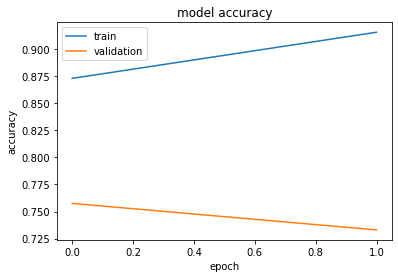

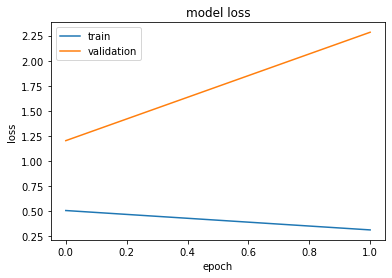

In [55]:
# plot info from model history object 

# list all data in history
print(H.history.keys())

# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [88]:
# %tensorboard --logdir logs/fit --bind_all